In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Define the basic OpenWeatherMap URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c86b9b70a2bee573afd2ee192ceae86"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taitung
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | kyabe
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | barawe
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | san andres
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | livny
Processing Record 13 of Set 1 | lokosovo
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | shakawe
Processing Record 17 of Set 1 | puro
Processing Record 18 of Set 1 | abonnema
Processing Record 19 of Set 1 | cururupu
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | krasnoselkup
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 

City not found. Skipping...
Processing Record 39 of Set 4 | mezen
Processing Record 40 of Set 4 | cervo
Processing Record 41 of Set 4 | esenyurt
Processing Record 42 of Set 4 | lasa
Processing Record 43 of Set 4 | black river
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | carndonagh
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | doha
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | viedma
Processing Record 50 of Set 4 | avera
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | montelimar
Processing Record 3 of Set 5 | dikson
Processing Record 4 of Set 5 | grindavik
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | vanavara
Processing Record 9 of Set 5 | two rivers
Processing Record 10 of Set 5 | bandarbeyla
Processing Record 11 of

Processing Record 29 of Set 8 | pontes e lacerda
Processing Record 30 of Set 8 | emerald
Processing Record 31 of Set 8 | kokomo
Processing Record 32 of Set 8 | aracati
Processing Record 33 of Set 8 | gashua
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | shelburne
Processing Record 36 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 37 of Set 8 | dingle
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | paraiso
Processing Record 40 of Set 8 | quebo
Processing Record 41 of Set 8 | imaculada
Processing Record 42 of Set 8 | galesong
Processing Record 43 of Set 8 | bubaque
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | saldanha
Processing Record 46 of Set 8 | khao yoi
Processing Record 47 of Set 8 | cabo san lucas
Processing Record 48 of Set 8 | catamarca
Processing Record 49 of Set 8 | tarata
Processing Record 50 of Set 8 | yulara
Processing Record 1 of Set 9 | caratinga
Processing Record 2 of Set

Processing Record 21 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 22 of Set 12 | sechura
Processing Record 23 of Set 12 | tevaitoa
Processing Record 24 of Set 12 | kegayli
City not found. Skipping...
Processing Record 25 of Set 12 | dukat
Processing Record 26 of Set 12 | toora-khem
Processing Record 27 of Set 12 | alvik
Processing Record 28 of Set 12 | edgewater
Processing Record 29 of Set 12 | nizhniy odes
Processing Record 30 of Set 12 | praia
Processing Record 31 of Set 12 | raja jang
Processing Record 32 of Set 12 | iwaki
Processing Record 33 of Set 12 | pitimbu
Processing Record 34 of Set 12 | babanusah
City not found. Skipping...
Processing Record 35 of Set 12 | copiapo
Processing Record 36 of Set 12 | notodden
Processing Record 37 of Set 12 | saint-georges
Processing Record 38 of Set 12 | puerto escondido
Processing Record 39 of Set 12 | ipixuna
Processing Record 40 of Set 12 | manicaragua
Processing Record 41 of Set 12 | mana
Processing Record 42 of Set 1

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taitung,22.7583,121.1444,64.40,77,75,5.75,TW,2021-02-04 23:51:48
1,Rikitea,-23.1203,-134.9692,78.78,68,97,11.27,PF,2021-02-04 23:49:55
2,Lompoc,34.6391,-120.4579,62.60,51,1,16.11,US,2021-02-04 23:50:46
3,Kyabe,9.4515,18.9449,77.83,18,21,8.23,TD,2021-02-04 23:51:49
4,Punta Arenas,-53.1500,-70.9167,55.40,47,0,26.46,CL,2021-02-04 23:51:49
5,Cape Town,-33.9258,18.4232,68.00,77,0,9.22,ZA,2021-02-04 23:50:44
6,Vaini,-21.2000,-175.2000,80.60,94,75,6.91,TO,2021-02-04 23:50:09
7,San Andres,12.5847,-81.7006,78.80,89,75,10.36,CO,2021-02-04 23:51:50
8,Mataura,-46.1927,168.8643,68.94,47,51,3.42,NZ,2021-02-04 23:51:50
9,Hambantota,6.1241,81.1185,75.15,77,89,16.51,LK,2021-02-04 23:51:50


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taitung,TW,2021-02-04 23:51:48,22.7583,121.1444,64.40,77,75,5.75
1,Rikitea,PF,2021-02-04 23:49:55,-23.1203,-134.9692,78.78,68,97,11.27
2,Lompoc,US,2021-02-04 23:50:46,34.6391,-120.4579,62.60,51,1,16.11
3,Kyabe,TD,2021-02-04 23:51:49,9.4515,18.9449,77.83,18,21,8.23
4,Punta Arenas,CL,2021-02-04 23:51:49,-53.1500,-70.9167,55.40,47,0,26.46
5,Cape Town,ZA,2021-02-04 23:50:44,-33.9258,18.4232,68.00,77,0,9.22
6,Vaini,TO,2021-02-04 23:50:09,-21.2000,-175.2000,80.60,94,75,6.91
7,San Andres,CO,2021-02-04 23:51:50,12.5847,-81.7006,78.80,89,75,10.36
8,Mataura,NZ,2021-02-04 23:51:50,-46.1927,168.8643,68.94,47,51,3.42
9,Hambantota,LK,2021-02-04 23:51:50,6.1241,81.1185,75.15,77,89,16.51


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612482794.43123

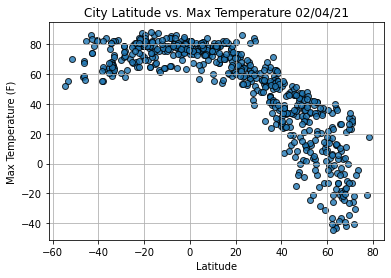

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

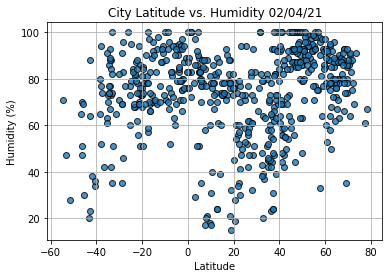

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

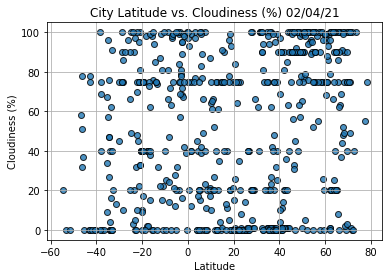

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

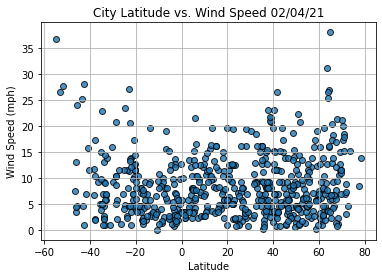

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

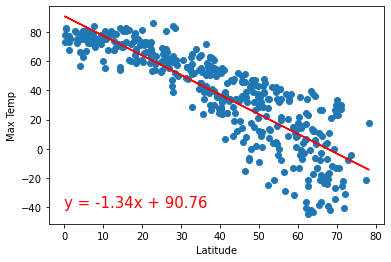

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', \
                       'Max Temp',(0,-40))

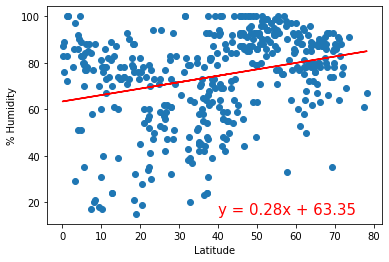

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', \
                       '% Humidity',(40,15))

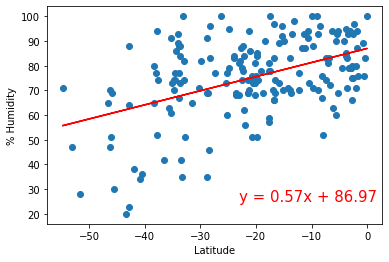

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',\
                       '% Humidity',(-23,25))

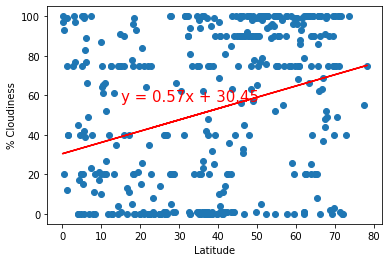

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', \
                       '% Cloudiness',(15,57))

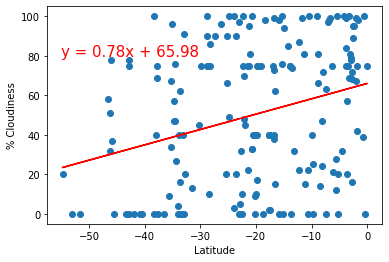

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', \
                       '% Cloudiness',(-55,80))

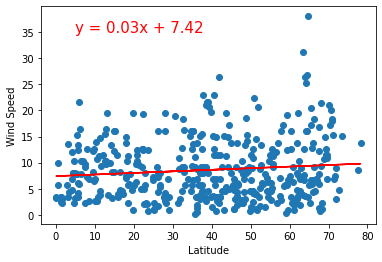

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', \
                       'Wind Speed',(5,35))

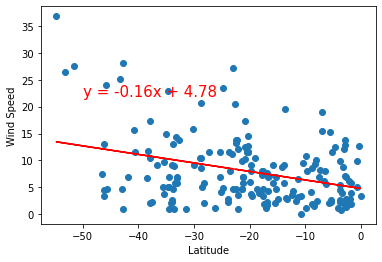

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', \
                       'Wind Speed',(-50,22))